In [1]:
#!pip install neptune-contrib -q
#!pip install neptune-notebooks -q
#!jupyter nbextension enable --py neptune-notebooks

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras import regularizers
print(tf.__version__)
import neptune
import cv2 as cv

2.1.0


In [2]:
import sys
sys.path.append('/home/ubuntu/intelliscope/modules')

import intelliscope
from intelliscope import SelectDataset
[pcg_dir,ecg_dir] = SelectDataset(0)


Loading... >  ICASSP_01
	=> /home/ubuntu/intelliscope/datasets/PhysioNet2016/preprocessed/training-a/original/ecg/01-cmor1.5-1.0/
	=> /home/ubuntu/intelliscope/datasets/PhysioNet2016/preprocessed/training-a/original/pcg/01-morl/


In [3]:
from ml_utils import log_model_weights,log_epoch_data

In [4]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNjBlODllY2ItMDcyZC00OGNmLThjZWYtZjM2MjE4Y2M5ZDM0In0="
os.environ['NEPTUNE_PROJECT']="icassp/Hybrid'"
#os.environ['NEPTUNE_NOTEBOOK_ID']="4897a223-8a9f-4f00-8cec-22eda690858d"
os.environ['NEPTUNE_NOTEBOOK_PATH']="notebooks_ramith/CNN_hybrid_transfer_learning_amuthu.ipynb"

In [5]:
!export NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNjBlODllY2ItMDcyZC00OGNmLThjZWYtZjM2MjE4Y2M5ZDM0In0="

In [6]:
NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiNjBlODllY2ItMDcyZC00OGNmLThjZWYtZjM2MjE4Y2M5ZDM0In0="
PARAMS = {'ignore_blanks' : True,
          'epochs' : 10,
         'validation_split':0.2,
         'batch_size' : 20,
         'train_test_split':0.8,
         'dense_layers':80,
          'dropout':0.1,
         'pcg_dataset_path':pcg_dir ,
         'ecg_dataset_path':ecg_dir ,
         'image_type' : 'rgb',
         'im_type':6,
         'Read_Type':1,
         'data_balanced':False,
         'leave_test':False,
          'amuthu':0
         }
xx = PARAMS['amuthu']

m = PARAMS['Read_Type']*3 + int(PARAMS['Read_Type']==0)
e = PARAMS['Read_Type']*6 + int(PARAMS['Read_Type']==0)*2

neptune.init('icassp/Hybrid',NEPTUNE_API_TOKEN)
exp = neptune.create_experiment(name='CNN_hybrid_transfer_learning_BestF1 Balanced ',description='#S2 with 35.h5',params=PARAMS,upload_source_files=['CNN_hybrid_transfer_learning_amuthu.ipynb'],tags=['ICASSP','xx','shuffle train only','balanced'],upload_stdout=True)


NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/icassp/Hybrid/e/HYBRID-82


In [7]:
PARAMS['batch_size']

20

In [8]:
exp

Experiment(HYBRID-82)

In [9]:
import core_modules

272 462


In [10]:
num_classes = 2 #added 


p = PARAMS['train_test_split']

core_modules.set_ignore_blanks(PARAMS['ignore_blanks'])                    ##ignores blank scalograms
core_modules.set_dataset_path(PARAMS['pcg_dataset_path'],PARAMS['ecg_dataset_path'],PARAMS['Read_Type'])  ##set dataset path  /home/ec2-user/SageMaker/datasets/Physionet2016_a/new_split_basedon_rawpcg/raw/pcg/


n, X, Y, img_names = core_modules.load_hybrid_data(PARAMS['leave_test']) #Leave test = false, 50 wen karannena

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1-p, random_state=42,shuffle=False)

from sklearn.utils import shuffle
x_train, y_train  = shuffle(x_train,y_train,random_state=42)

x_train =  x_train.reshape((len(y_train),272,462,PARAMS['im_type']))
x_test  =  x_test.reshape(len(y_test),272,462,PARAMS['im_type'])

class_names= []
for i in range(0,2):
    class_names.append(str(i))

# Showing a few examples
#show_image_examples(class_names, x_train, y_train)


x_train, x_test = x_train / 255.0, x_test / 255.0

 💡 => Total images (.tiff) found  3496
 ⚡️ => After ignoring blanks loaded  3350
0
1000
2000
3000
3350 Images loaded across 2 Categories


MemoryError: Unable to allocate 15.1 GiB for an array with shape (2680, 272, 462, 6) and data type float64

In [ ]:

x_train1 = x_train[:,:,:,0:m]
x_train2 = x_train[:,:,:,m-xx:e-xx] 

#PCG RGB RGB



x_train1 = x_train1.reshape((len(x_train),272,462,m))
x_train2 = x_train2.reshape((len(x_train),272,462,m))



(2680, 272, 462, 3)


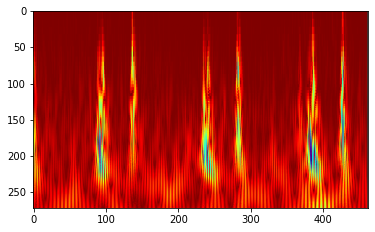

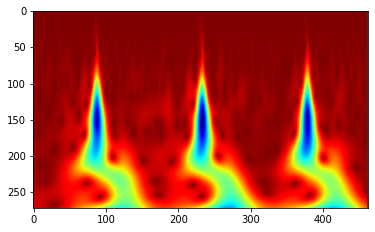

In [12]:
a = x_train1[0]
b = x_train2[0]

plt.figure()
plt.imshow(a)
plt.figure()
plt.imshow(b)
print(x_train2.shape)

In [13]:
a.shape

(272, 462, 3)

In [14]:
resized_x_train2 = np.zeros((len(x_train),270,556,m))


for i in range(0,len(x_train)):
    resized_x_train2[i] = cv.resize(x_train2[i], (556,270), interpolation = cv.INTER_AREA)

In [15]:
resized_x_train2.shape

(2680, 270, 556, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


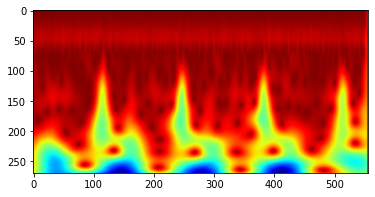

In [16]:
plt.imshow((resized_x_train2[10] ))

In [17]:
model = tf.keras.models.load_model('/home/ec2-user/SageMaker/notebooks_ramith/udith_hs_models/35.h5')#,custom_objects={'tf': tf})

#model.summary()
HS_MODEL= tf.keras.Model(inputs=model.input, outputs=model.get_layer('flatten_2').output)
HS_MODEL.trainable=True
HS_MODEL.summary()

model2 = tf.keras.models.load_model('/home/ec2-user/SageMaker/notebooks_ramith/EL241.h5')

#model.summary()

ECG_MODEL= tf.keras.Model(inputs=model2.input, outputs=model2.get_layer('flatten').output)
ECG_MODEL.trainable=True
print("ECG")
ECG_MODEL.summary()





Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 272, 462, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 272, 462, 4)       592       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 154, 4)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 154, 4)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 84, 148, 16)       3152      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 49, 16)        0         
______________________________________________

In [18]:
'''
def create_convolution_layers(input_img):
    
    conv2d = tf.keras.layers.Conv2D(4, kernel_size=(7,7), padding='same', activation='relu', input_shape=(272,462,m))(input_img)
    max_pooling2d = tf.keras.layers.MaxPool2D(pool_size=(3,3))(conv2d)
    #model = tf.keras.layers.Conv2D(16, kernel_size=(7,7), activation='relu')(max_pooling2d)
    conv2d_1 = tf.keras.layers.Conv2D(16, kernel_size=(7,7), activation='relu',kernel_regularizer=regularizers.l2(0.001))(max_pooling2d)
    max_pooling2d_1  = tf.keras.layers.MaxPool2D(pool_size=(3,3))(conv2d_1)
    model =     tf.keras.layers.Conv2D(32, kernel_size=(7,7), activation='relu',kernel_regularizer=regularizers.l2(0.001))(max_pooling2d_1)

    return model
    
'''

"\ndef create_convolution_layers(input_img):\n    \n    conv2d = tf.keras.layers.Conv2D(4, kernel_size=(7,7), padding='same', activation='relu', input_shape=(272,462,m))(input_img)\n    max_pooling2d = tf.keras.layers.MaxPool2D(pool_size=(3,3))(conv2d)\n    #model = tf.keras.layers.Conv2D(16, kernel_size=(7,7), activation='relu')(max_pooling2d)\n    conv2d_1 = tf.keras.layers.Conv2D(16, kernel_size=(7,7), activation='relu',kernel_regularizer=regularizers.l2(0.001))(max_pooling2d)\n    max_pooling2d_1  = tf.keras.layers.MaxPool2D(pool_size=(3,3))(conv2d_1)\n    model =     tf.keras.layers.Conv2D(32, kernel_size=(7,7), activation='relu',kernel_regularizer=regularizers.l2(0.001))(max_pooling2d_1)\n\n    return model\n    \n"

In [19]:
hs_input = tf.keras.layers.Input(shape=(272,462,m))
hs_model = HS_MODEL(hs_input)
ecg_input = tf.keras.layers.Input(shape=(270,556,m))
ecg_model = ECG_MODEL(ecg_input)

print(ecg_model.get_shape())
print(hs_model.get_shape())

(?, 4800)
(?, 3840)


In [20]:
concat     = tf.keras.layers.concatenate([hs_model, ecg_model])


#batchnorm  = tf.keras.layers.BatchNormalization()(concat)
#dense      = tf.keras.layers.Dense(80, activation='relu')(batchnorm)


dropout    = tf.keras.layers.Dropout(PARAMS['dropout'])(concat)
dense      = tf.keras.layers.Dense(PARAMS['dense_layers'], activation='relu')(dropout)

dense_1    = tf.keras.layers.Dense(20, activation='relu')(dense)
output = tf.keras.layers.Dense(2, activation='softmax')(dense_1)

model = tf.keras.Model(inputs=[hs_input, ecg_input], outputs=[output])



model.compile(optimizer=keras.optimizers.Adam(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 272, 462, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 270, 556, 3) 0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 3840)         47360       input_1[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 4800)         47360       input_2[0][0]                    
____________________________________________________________________________________________

In [21]:

model.summary(print_fn=lambda x: neptune.log_text('model_summary', x))

In [22]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 272, 462, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 270, 556, 3) 0                                            
__________________________________________________________________________________________________
model (Model)                   (None, 3840)         47360       input_1[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 4800)         47360       input_2[0][0]                    
____________________________________________________________________________________________

In [23]:
len(y_train[y_train==1])/len(y_train)

0.7194029850746269

In [24]:
len(y_test[y_test==1])/len(y_test)

0.7402985074626866

In [25]:
print(num_classes)

2


In [26]:
x_train1.shape

(2680, 272, 462, 3)

In [27]:
resized_x_train2.shape

(2680, 270, 556, 3)

In [28]:
history = model.fit([x_train1,resized_x_train2], y_train,  batch_size=PARAMS['batch_size'], validation_split=PARAMS['validation_split'],epochs=PARAMS['epochs'],callbacks=[
                tf.keras.callbacks.LambdaCallback(
                    on_epoch_end=lambda epoch, logs: log_epoch_data(logs, exp)),
])

Train on 2144 samples, validate on 536 samples
Epoch 1/10
2144/2144 [==============================] - 52s 24ms/sample - loss: 0.5260 - sparse_categorical_accuracy: 0.7509 - val_loss: 0.4488 - val_sparse_categorical_accuracy: 0.8172
Epoch 2/10
2144/2144 [==============================] - 53s 25ms/sample - loss: 0.3753 - sparse_categorical_accuracy: 0.8391 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.8302
Epoch 3/10
2144/2144 [==============================] - 53s 25ms/sample - loss: 0.2749 - sparse_categorical_accuracy: 0.8974 - val_loss: 0.4151 - val_sparse_categorical_accuracy: 0.8563
Epoch 4/10
2144/2144 [==============================] - 54s 25ms/sample - loss: 0.2153 - sparse_categorical_accuracy: 0.9128 - val_loss: 0.4502 - val_sparse_categorical_accuracy: 0.8321
Epoch 5/10
2144/2144 [==============================] - 54s 25ms/sample - loss: 0.1769 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.5401 - val_sparse_categorical_accuracy: 0.8657
Epoch 6/10
2144/2144 [=

In [29]:
x_test1 = x_test[:,:,:,0:m]
x_test2 = x_test[:,:,:,m-xx:e-xx]

In [30]:
x_test1 = x_test1.reshape((len(x_test),272,462,m))
x_test2 = x_test2.reshape((len(x_test),272,462,m))#ECGGGGG 

resized_x_test2 = np.zeros((len(x_test),270,556,m))


for i in range(0,len(x_test)):
    resized_x_test2[i] = cv.resize(x_test2[i], (556,270), interpolation = cv.INTER_AREA)


In [31]:
score = model.evaluate([x_test1,resized_x_test2],  y_test, verbose=2)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


print('\nHistory dict:', history.history)

670/670 - 5s - loss: 1.1588 - sparse_categorical_accuracy: 0.8045
Test loss: 1.1588448670373035
Test accuracy: 0.80447763

History dict: {'loss': [0.5259540071849947, 0.3752902244676405, 0.2749455959689039, 0.21526173365288484, 0.17690939492365318, 0.09948991802729555, 0.10736566351434744, 0.08395509903124575, 0.07664913396045232, 0.05193693161274848], 'sparse_categorical_accuracy': [0.7509328, 0.8390858, 0.89738804, 0.91277987, 0.9370336, 0.9664179, 0.9673507, 0.9762127, 0.97807837, 0.9869403], 'val_loss': [0.44876529676700705, 0.4169868230819702, 0.4151209124655866, 0.45016684677841057, 0.5401482404445979, 0.5485992516154674, 0.49391046358244634, 0.5522259233602836, 0.5137034593872837, 0.6119994785525461], 'val_sparse_categorical_accuracy': [0.8171642, 0.83022386, 0.85634327, 0.83208954, 0.86567163, 0.8619403, 0.89179105, 0.8880597, 0.87873137, 0.88619405]}


670/670 - 5s - loss: 1.1588 - sparse_categorical_accuracy: 0.8045


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


0.80447763


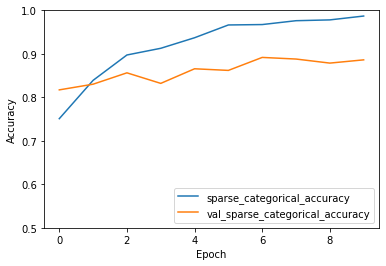

In [32]:
fig = plt.figure()
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate([x_test1,resized_x_test2],  y_test, verbose=2)

fig.canvas.draw()
curve = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
curve = curve.reshape(fig.canvas.get_width_height()[::-1] + (3,))

neptune.log_image('learning_curve', curve)
neptune.log_metric('Test Accuracy',test_acc)
neptune.log_metric('Test Loss',test_loss)
print(test_acc)

In [33]:

loss, acc = model.evaluate([x_test1,resized_x_test2],  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

670/670 - 5s - loss: 1.1588 - sparse_categorical_accuracy: 0.8045
Restored model, accuracy: 80.45%


In [ ]:
keras_model_path = "/home/ec2-user/SageMaker/notebooks_ramith/out/"  + str(exp) + '.h5'  

model.save(keras_model_path)  # save() should be called out of strategy scope

neptune.log_artifact(keras_model_path)


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict([x_test1,resized_x_test2], batch_size=100, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

z = classification_report(y_test, y_pred_bool)
print(z)

neptune.log_text('classification_report', z)

In [ ]:
#!pip install neptune-contrib -q

In [ ]:
#!pip install scikit-plot -q

In [ ]:
from neptunecontrib.monitoring.metrics import *

threshold = 0.5

log_confusion_matrix(y_test, y_pred[:, 1] > threshold)
log_classification_report(y_test, y_pred[:, 1] > threshold)
log_class_metrics(y_test, y_pred[:, 1] > threshold)
log_class_metrics_by_threshold(y_test, y_pred[:, 1])
log_roc_auc(y_test, y_pred)
log_precision_recall_auc(y_test, y_pred)
log_brier_loss(y_test, y_pred[:, 1])
log_log_loss(y_test, y_pred)
log_ks_statistic(y_test, y_pred)
log_cumulative_gain(y_test, y_pred)
log_lift_curve(y_test, y_pred)
log_prediction_distribution(y_test, y_pred[:, 1])

In [ ]:
neptune.stop()
    

In [ ]:
'''

core_modules.set_dataset_path(PARAMS['dataset_path'],PARAMS['Read_Type'])
n, test_50_X, test_50_Y,test_50_names  = core_modules.load_hybrid_data(PARAMS['leave_test'],test_set='testset')

'''

In [ ]:
#test_50_names[0:7]

In [ ]:
#test_50_X = test_50_X/255.0

In [ ]:
'''
test_50_1 = test_50_X[:,:,:,0:m]
test_50_2 = test_50_X[:,:,:,m:e]

test_50_1 = test_50_1.reshape((len(test_50_X),272,462,m))
test_50_2 = test_50_2.reshape((len(test_50_X),272,462,m))#ECGGGGG 


resized_test_50_2 = np.zeros((len(test_50_X),270,556,m))

for i in range(0,len(test_50_2)):
    resized_test_50_2[i] = cv.resize(test_50_2[i], (556,270), interpolation = cv.INTER_AREA)
'''

In [ ]:
'''
loss, acc = model.evaluate([test_50_1,resized_test_50_2],  test_50_Y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))
'''

In [ ]:
#records = np.array(pd.read_csv('test_records.csv'))[:,1]  


In [ ]:
#len(records)

#### 

In [ ]:
'''
scores = {}

labels = {}

testkeycount  = 0 
records = sorted(np.array(pd.read_csv('test_records.csv'))[:,1])

for i in range(0,len(test_50_names)):
    key = test_50_names[i][:5]
    
    
    input1 = test_50_1[i]
    input2 = resized_test_50_2[i]
    
    
    print(test_50_names[i],test_50_Y[i])
    plt.figure()
    plt.imshow(input1)
    plt.figure()
    plt.imshow(input2)
    
    
    input1 = input1.reshape(1,272,462,3)
    input2 = input2.reshape(1,270,556,3)

    y_pred = model.predict([input1,input2])
    
    if key not in scores.keys():
        scores[key] = []
        labels[key] = test_50_Y[i]
        testkeycount +=1
        
    scores[key].append(y_pred[0][1])
print(testkeycount)
    
'''

In [ ]:
'''
avg_score = {}
test_50_pred = []
test_50_labels = []

TP = 0

for i in range(0,len(records)):
    key = records[i]
    
    avg_score[key]=  [ sum(scores[key])/len(scores[key]), labels[key]]

    test_50_pred.append(sum(scores[key])/len(scores[key]))
    test_50_labels.append(labels[key])
    
test_50_pred   = np.array(test_50_pred)
test_50_labels = np.array(test_50_labels)
'''

In [ ]:
#avg_score


In [ ]:
'''
test_50_pred_bool = test_50_pred > 0.5
z = classification_report(test_50_labels, test_50_pred_bool)
print(z)
'''

In [ ]:

#neptune.log_text('score_report_on_50_leftout',  str(avg_score))

In [ ]:
1/60